<a href="https://colab.research.google.com/github/aarupach/Aaru/blob/main/Simple_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Create sample advertising dataset
# In practice, you can load from CSV: pd.read_csv('advertising.csv')
np.random.seed(42)
n_samples = 200

In [ ]:
# Generate synthetic advertising data
advertising = np.random.uniform(10, 100, n_samples)
# Sales = 50 + 3 * advertising + noise
sales = 50 + 3 * advertising + np.random.normal(0, 20, n_samples)

In [ ]:
# Create DataFrame
df = pd.DataFrame({
    'Advertising': advertising,
    'Sales': sales
})

In [ ]:
print("="*60)
print("SALES vs ADVERTISING - LINEAR REGRESSION ANALYSIS")
print("="*60)
print("\nDataset Shape:", df.shape)
print("\nFirst 10 rows:")
print(df.head(10))
print("\nStatistical Summary:")
print(df.describe())
print("\nCorrelation between Advertising and Sales:")
print(f"Correlation coefficient: {df['Advertising'].corr(df['Sales']):.4f}")

SALES vs ADVERTISING - LINEAR REGRESSION ANALYSIS

Dataset Shape: (200, 2)

First 10 rows:
   Advertising       Sales
0    43.708611  167.525338
1    95.564288  341.337937
2    75.879455  283.499814
3    63.879264  227.350762
4    24.041678  159.440523
5    24.039507  131.595179
6    15.227525   71.856505
7    87.955853  326.998632
8    64.100351  222.807420
9    73.726532  286.921288

Statistical Summary:
       Advertising       Sales
count   200.000000  200.000000
mean     53.560561  212.029968
std      26.540229   81.496936
min      10.496991   61.645485
25%      30.572417  140.248988
50%      54.503763  206.585381
75%      78.117365  283.541670
max      98.819824  371.678921

Correlation between Advertising and Sales:
Correlation coefficient: 0.9713


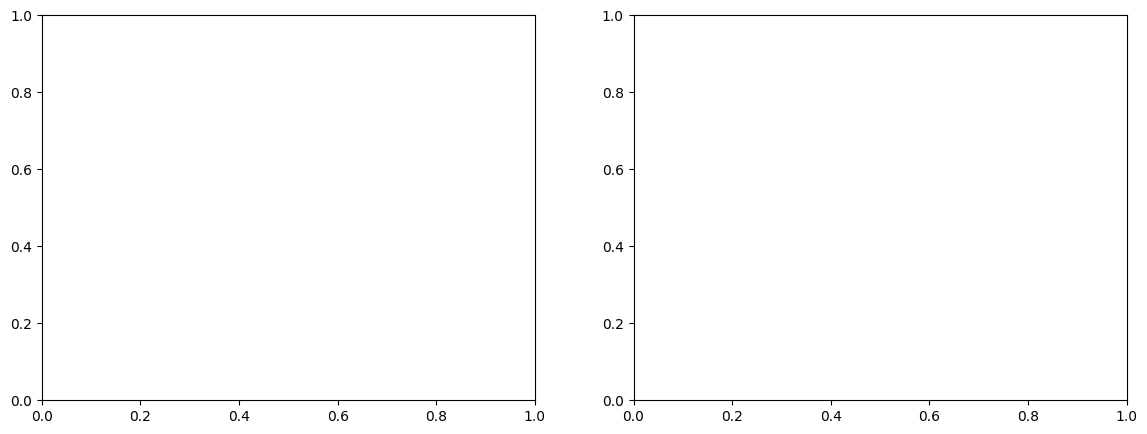

In [ ]:
# Exploratory Data Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

In [ ]:
# Scatter plot
axes[0].scatter(df['Advertising'], df['Sales'], alpha=0.6, color='blue', edgecolors='k')
axes[0].set_xlabel('Advertising Budget ($1000s)', fontsize=12)
axes[0].set_ylabel('Sales ($1000s)', fontsize=12)
axes[0].set_title('Sales vs Advertising Budget', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

In [ ]:
# Distribution plots
axes[1].hist(df['Advertising'], bins=20, alpha=0.7, label='Advertising', color='green', edgecolor='black')
axes[1].hist(df['Sales'], bins=20, alpha=0.7, label='Sales', color='orange', edgecolor='black')
axes[1].set_xlabel('Value ($1000s)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Advertising and Sales', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Prepare data for modeling
X = df[['Advertising']].values  # Feature (2D array)
y = df['Sales'].values           # Target (1D array)

In [ ]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print("\n" + "="*60)
print("DATA SPLIT")
print("="*60)
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


DATA SPLIT
Training set size: 160 samples
Testing set size: 40 samples


In [ ]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model parameters
print("\n" + "="*60)
print("MODEL PARAMETERS")
print("="*60)
print(f"Intercept (β₀): {model.intercept_:.4f}")
print(f"Coefficient (β₁): {model.coef_[0]:.4f}")
print(f"\nRegression Equation:")
print(f"Sales = {model.intercept_:.4f} + {model.coef_[0]:.4f} × Advertising")


MODEL PARAMETERS
Intercept (β₀): 50.0581
Coefficient (β₁): 3.0233

Regression Equation:
Sales = 50.0581 + 3.0233 × Advertising


In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)


MODEL EVALUATION


In [ ]:
# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

In [ ]:
print("\nTraining Set Performance:")
print(f"  Mean Squared Error (MSE): {train_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"  R² Score: {train_r2:.4f}")


Training Set Performance:
  Mean Squared Error (MSE): 359.8984
  Root Mean Squared Error (RMSE): 18.9710
  Mean Absolute Error (MAE): 14.9999
  R² Score: 0.9468


In [ ]:
# Testing set metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
print("\nTesting Set Performance:")
print(f"  Mean Squared Error (MSE): {test_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"  R² Score: {test_r2:.4f}")


Testing Set Performance:
  Mean Squared Error (MSE): 433.8495
  Root Mean Squared Error (RMSE): 20.8291
  Mean Absolute Error (MAE): 16.7748
  R² Score: 0.9276


In [ ]:
# Interpretation
print("\n" + "="*60)
print("INTERPRETATION")
print("="*60)
print(f"• For every $1000 increase in advertising budget,")
print(f"  sales increase by approximately ${model.coef_[0]:.2f} thousand")
print(f"• The model explains {test_r2*100:.2f}% of the variance in sales")
print(f"• Base sales (with zero advertising): ${model.intercept_:.2f} thousand")


INTERPRETATION
• For every $1000 increase in advertising budget,
  sales increase by approximately $3.02 thousand
• The model explains 92.76% of the variance in sales
• Base sales (with zero advertising): $50.06 thousand


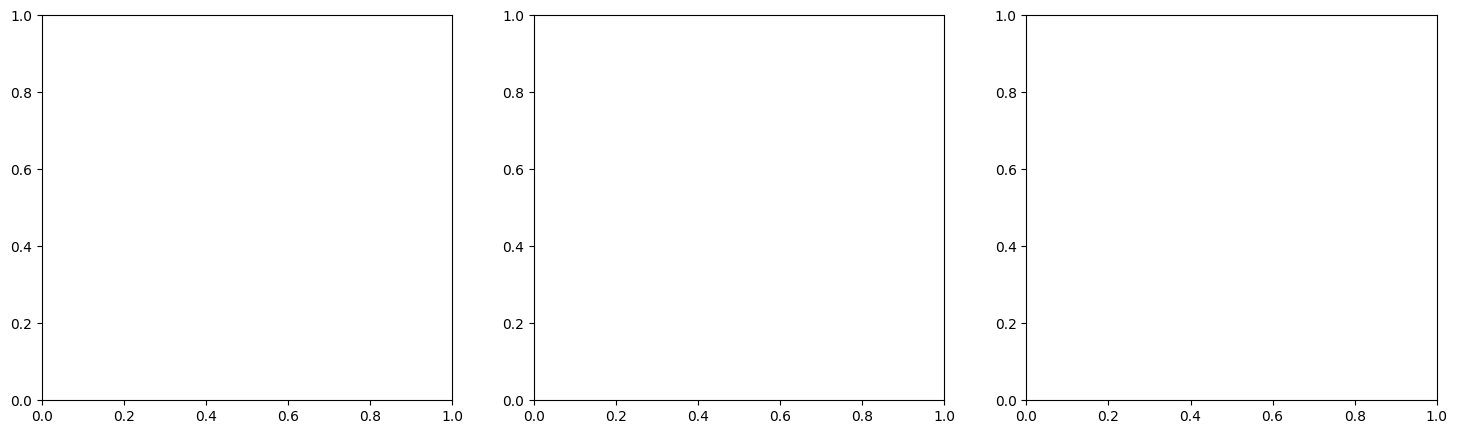

In [ ]:
# Visualization of results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

In [ ]:
# Plot 1: Regression line with training and test data
axes[0].scatter(X_train, y_train, alpha=0.6, label='Training data', color='blue', edgecolors='k')
axes[0].scatter(X_test, y_test, alpha=0.6, label='Testing data', color='red', edgecolors='k')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
axes[0].plot(X_line, y_line, color='green', linewidth=2, label='Regression line')
axes[0].set_xlabel('Advertising Budget ($1000s)', fontsize=12)
axes[0].set_ylabel('Sales ($1000s)', fontsize=12)
axes[0].set_title('Linear Regression Model', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

In [ ]:
# Plot 2: Residuals plot
residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.6, color='purple', edgecolors='k')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Sales ($1000s)', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

In [ ]:
# Plot 3: Actual vs Predicted
axes[2].scatter(y_test, y_test_pred, alpha=0.6, color='orange', edgecolors='k')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect prediction')
axes[2].set_xlabel('Actual Sales ($1000s)', fontsize=12)
axes[2].set_ylabel('Predicted Sales ($1000s)', fontsize=12)
axes[2].set_title('Actual vs Predicted Sales', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make predictions for new advertising budgets
print("\n" + "="*60)
print("PREDICTION EXAMPLES")
print("="*60)
new_advertising = np.array([[20], [50], [80], [100]])
predicted_sales = model.predict(new_advertising)

for adv, pred in zip(new_advertising, predicted_sales):
    print(f"Advertising budget: ${adv[0]:.2f}k → Predicted sales: ${pred:.2f}k")


PREDICTION EXAMPLES
Advertising budget: $20.00k → Predicted sales: $110.52k
Advertising budget: $50.00k → Predicted sales: $201.22k
Advertising budget: $80.00k → Predicted sales: $291.92k
Advertising budget: $100.00k → Predicted sales: $352.38k


In [ ]:
# Model assumptions check
print("\n" + "="*60)
print("MODEL ASSUMPTIONS CHECK")
print("="*60)
print("1. Linearity: Check the scatter plot - relationship should be linear")
print("2. Independence: Assumes observations are independent")
print("3. Homoscedasticity: Residuals should have constant variance (check residual plot)")
print("4. Normality: Residuals should be normally distributed")


MODEL ASSUMPTIONS CHECK
1. Linearity: Check the scatter plot - relationship should be linear
2. Independence: Assumes observations are independent
3. Homoscedasticity: Residuals should have constant variance (check residual plot)
4. Normality: Residuals should be normally distributed


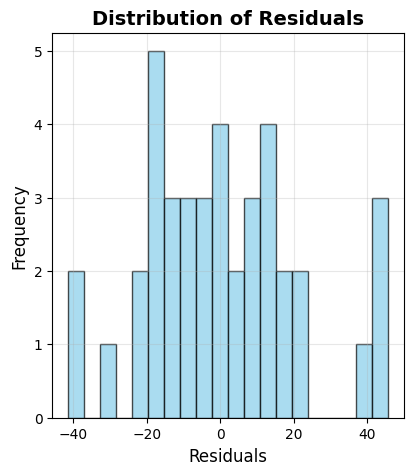

In [ ]:
# Histogram of residuals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Residuals', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

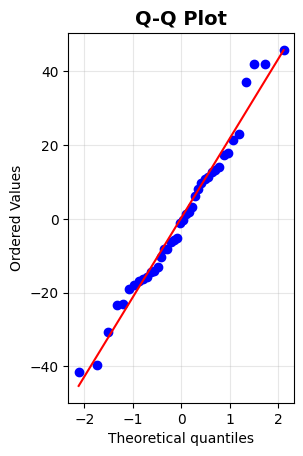

In [ ]:
# Q-Q plot
plt.subplot(1, 2, 2)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
print("\nLinear Regression Analysis Complete!")


Linear Regression Analysis Complete!
